In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
# データセットの読み込み
dataset = load_iris()
x = dataset.data
t = dataset.target
feature_names = dataset.feature_names

In [3]:
# 読み込んだデータセットを DataFrame に変換
df = pd.DataFrame(data=x, columns=feature_names)
df['Target'] = t

df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
# t のユニークな値を確認
np.unique(t)

array([0, 1, 2])

In [5]:
x.shape, t.shape

((150, 4), (150,))

In [6]:
# 学習データとテストデータに分割
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [7]:
# モデルの定義
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

In [8]:
# モデルの学習
dtree.fit(x_train, t_train)

DecisionTreeClassifier(random_state=0)

In [9]:
# モデルの検証
print('train score : ', dtree.score(x_train, t_train))
print('test score : ', dtree.score(x_test, t_test))

train score :  1.0
test score :  0.9777777777777777


In [10]:
# 推論
dtree.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [11]:
# 木構造の書き出し
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree)

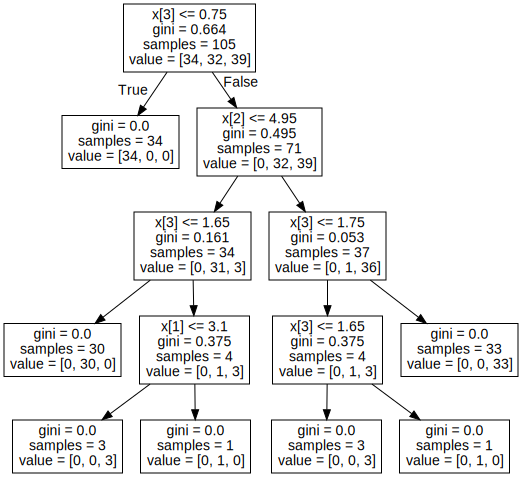

In [12]:
# 木構造の表示
graph_tree = graphviz.Source(dot_data)
graph_tree

In [13]:
# feature importance
feature_importance = dtree.feature_importances_
feature_importance

array([0.        , 0.02150464, 0.39766951, 0.58082584])

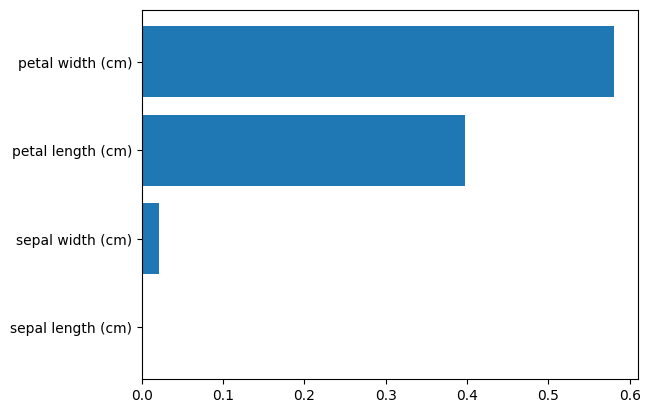

In [14]:
# 可視化
y = feature_names
width = feature_importance

# 横向きで表示
plt.barh(y=y, width=width);

In [15]:
# モデルの定義
from sklearn.svm import SVC
svc = SVC()

In [16]:
# モデルの学習
svc.fit(x_train, t_train)

SVC()

In [17]:
# モデルの検証
print('train score : ', svc.score(x_train, t_train))
print('test score : ', svc.score(x_test, t_test))

train score :  0.9714285714285714
test score :  0.9777777777777777


In [18]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [19]:
std_scaler.fit(x_train)

StandardScaler()

In [20]:
# 標準化
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

In [21]:
# 平均
round(x_train_std.mean())

0

In [22]:
# 標準偏差
round(x_train_std.std())

1

In [23]:
# モデルの定義
svc_std = SVC()

In [24]:
# モデルの学習
svc_std.fit(x_train_std, t_train)

SVC()

In [25]:
# モデルの検証
print('train score : ', svc.score(x_train, t_train))
print('test score : ', svc.score(x_test, t_test))

print('train score scaling : ', svc_std.score(x_train_std, t_train))
print('test score scaling : ', svc_std.score(x_test_std, t_test))

train score :  0.9714285714285714
test score :  0.9777777777777777
train score scaling :  0.9714285714285714
test score scaling :  0.9777777777777777


In [26]:
# モデルの定義
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1.0)

In [27]:
# モデルの学習
log_reg.fit(x_train, t_train)

LogisticRegression()

In [28]:
# モデルの検証
print('train score : ', log_reg.score(x_train, t_train))
print('test score : ', log_reg.score(x_test, t_test))

train score :  0.9809523809523809
test score :  0.9777777777777777


In [29]:
log_reg.coef_.shape

(3, 4)

In [30]:
# 重み（係数）
log_reg.coef_

array([[-0.39783961,  0.83360655, -2.28957943, -0.97852276],
       [ 0.54462603, -0.29016523, -0.23266966, -0.65809245],
       [-0.14678642, -0.54344132,  2.52224909,  1.63661521]])

In [31]:
# 切片
log_reg.intercept_

array([  9.00084685,   1.54172321, -10.54257007])

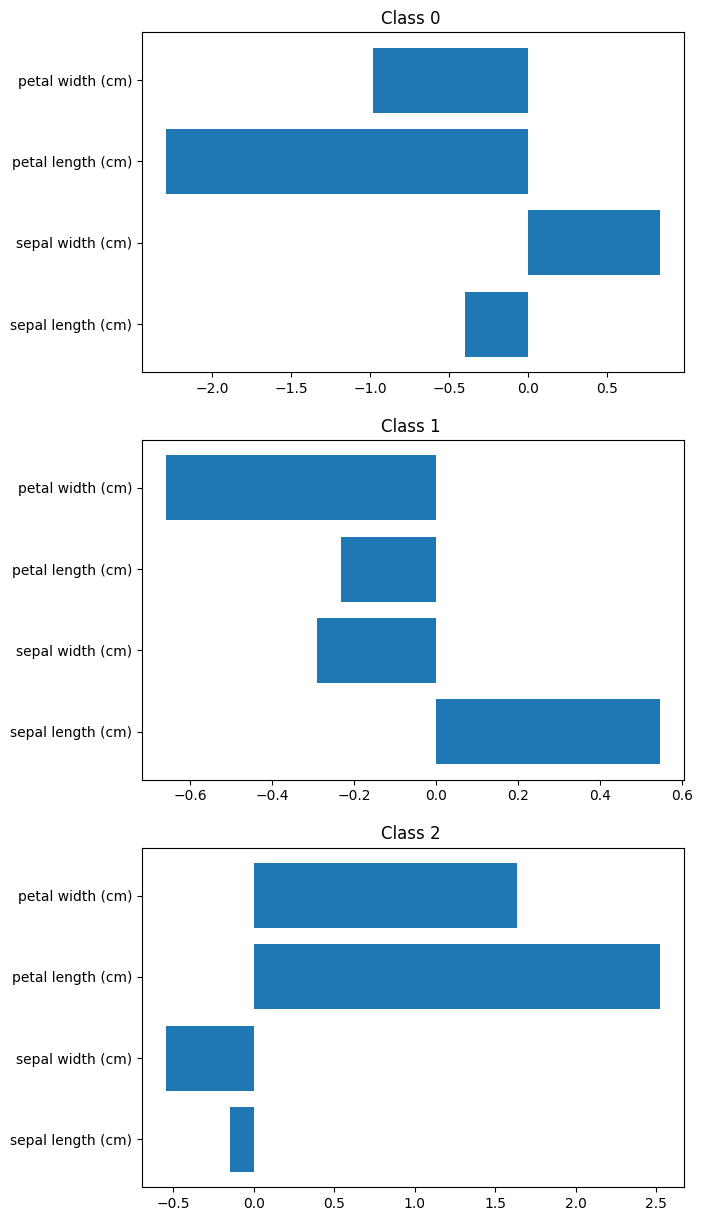

In [32]:
# それぞれの重みを確認
fig = plt.figure(figsize=(7, 15))

for i in range(len(log_reg.coef_)):
    ax = fig.add_subplot(3, 1, i+1)
    ax.barh(y=dataset.feature_names, width=log_reg.coef_[i])
    ax.set_title('Class {} '.format(i))

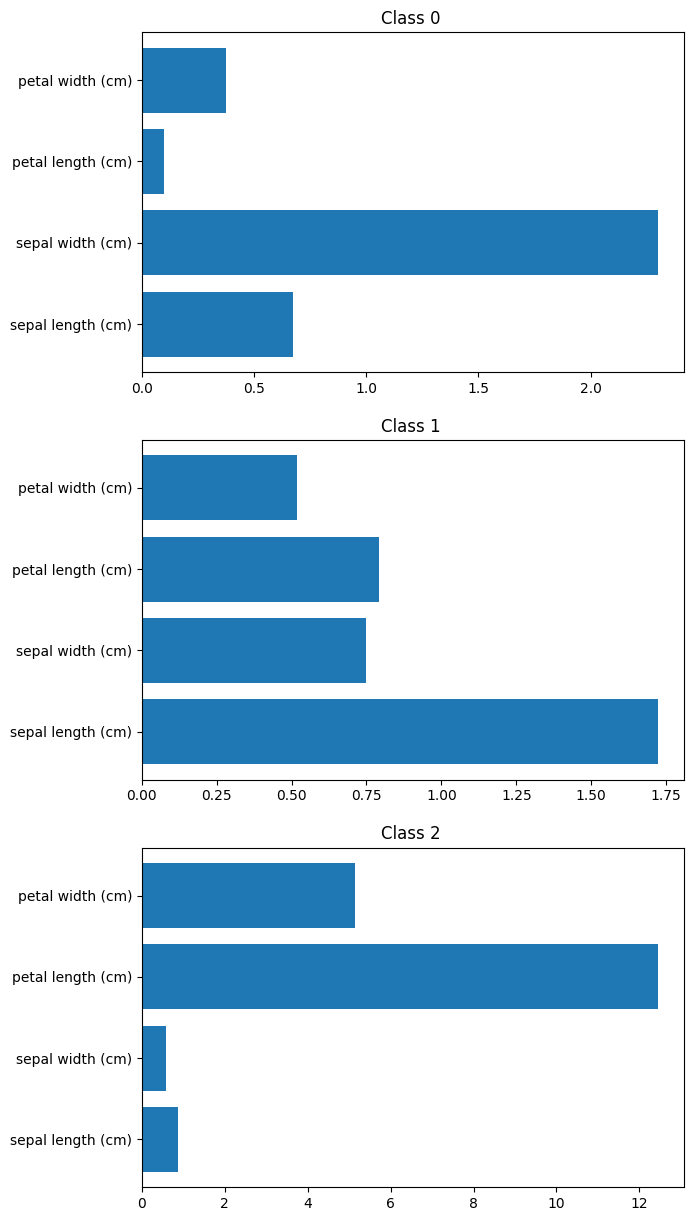

In [33]:
# 各オッズ比を確認
fig = plt.figure(figsize=(7, 15))

for i in range(len(log_reg.coef_)):
    ax = fig.add_subplot(3, 1, i+1)
    odds_ratio = np.exp(log_reg.coef_[i])
    ax.barh(y=dataset.feature_names, width=odds_ratio)
    ax.set_title('Class {} '.format(i))

In [34]:
# カテゴリ 0 の場合
print('重み(係数):',log_reg.coef_[0])
print('オッズ比:',  np.exp(log_reg.coef_[0]))

重み(係数): [-0.39783961  0.83360655 -2.28957943 -0.97852276]
オッズ比: [0.67176976 2.30160465 0.10130906 0.37586593]


In [35]:
# 目標値の取得
log_reg.predict([x_test[0]])

array([2])

In [36]:
# 各カテゴリに対する確率の確認
log_reg.predict_proba([x_test[0]])

array([[1.31633381e-04, 5.98687064e-02, 9.39999660e-01]])

In [37]:
# モデルの定義
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=3, max_depth=2, random_state=0)

In [38]:
# モデルの学習
model.fit(x_train, t_train)

RandomForestClassifier(max_depth=2, n_estimators=3, random_state=0)

In [39]:
# モデルの検証
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.9523809523809523
test score :  0.9555555555555556


In [40]:
# 特徴量重要度の確認
model.feature_importances_

array([0.18666585, 0.        , 0.32209545, 0.4912387 ])

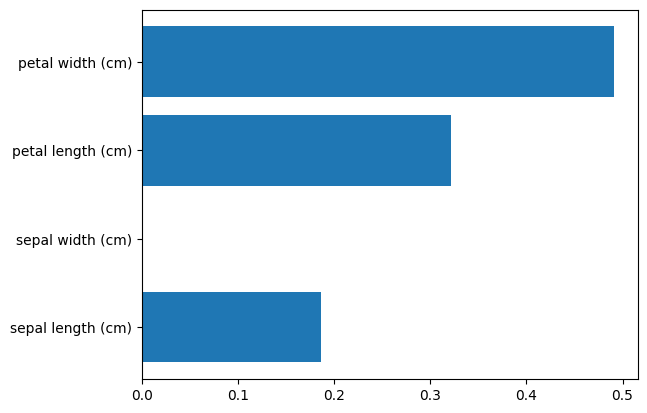

In [41]:
# 可視化
y = feature_names
width = model.feature_importances_

# 横向きで表示
plt.barh(y=y, width=width);

In [42]:
# モデルの定義
from xgboost import XGBClassifier
model = XGBClassifier()

# モデルの学習
model.fit(x_train, t_train)

# モデルの検証
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  1.0
test score :  0.9777777777777777


 # 確認テスト

In [44]:
df_train = pd.read_csv("/content/drive/MyDrive/wine_class_train.csv")
df_train.head()

,Class,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,1,13.71,2.36,16.6,101,2.61,2.88,0.27,3.80,1.11,1035
1,2,12.22,1.94,19.0,92,2.36,2.04,0.39,2.70,0.86,312
2,3,13.27,2.26,20.0,120,1.59,0.69,0.43,10.20,0.59,835
3,3,13.16,2.15,21.0,102,1.50,0.55,0.43,4.00,0.60,830
4,2,13.86,2.67,25.0,86,2.95,2.86,0.21,3.38,1.36,410


In [45]:
df_test = pd.read_csv("/content/drive/MyDrive/wine_class_test.csv")
df_test.head()

,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,13.74,2.25,16.4,118,2.60,2.90,0.21,5.85,0.92,1060
1,12.79,2.48,22.0,112,1.48,1.36,0.24,10.80,0.48,480
2,12.37,2.16,19.0,87,3.50,3.10,0.19,4.45,1.22,420
3,13.56,2.46,20.5,116,2.96,2.78,0.20,6.25,0.98,1120
4,13.05,2.13,21.5,86,2.62,2.65,0.30,2.60,0.73,380


In [46]:
# モデルの定義
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

In [50]:
x_train = df_train.drop(["Class"], axis=1).values

In [53]:
t_train = df_train['Class'].values

In [54]:
# モデルの学習
dtree.fit(x_train, t_train)

DecisionTreeClassifier(random_state=0)

In [55]:
# モデルの検証
print('train score : ', dtree.score(x_train, t_train))

train score :  1.0


In [56]:
x_test = df_test.values

In [58]:
# 推論
y = dtree.predict(x_test)

In [60]:
pd.Series(y, name='pred').to_csv('submission.csv', index=None)

In [61]:
# 木構造の書き出し
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree)

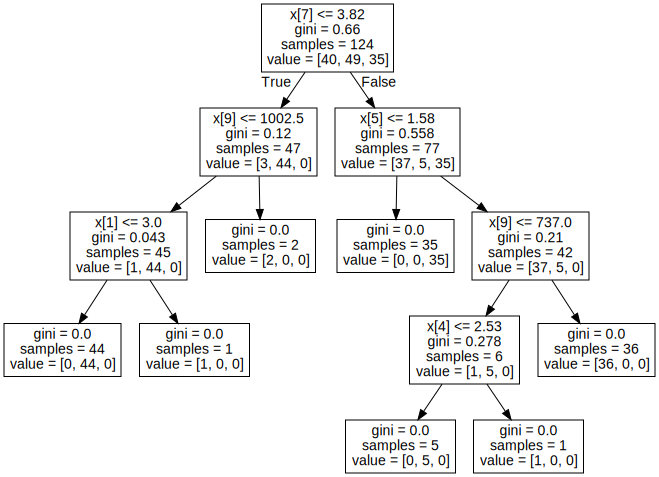

In [62]:
# 木構造の表示
graph_tree = graphviz.Source(dot_data)
graph_tree

In [63]:
# feature importance
feature_importance = dtree.feature_importances_
feature_importance

array([0.        , 0.02389053, 0.        , 0.        , 0.02036125,
       0.4175378 , 0.        , 0.40621672, 0.        , 0.1319937 ])

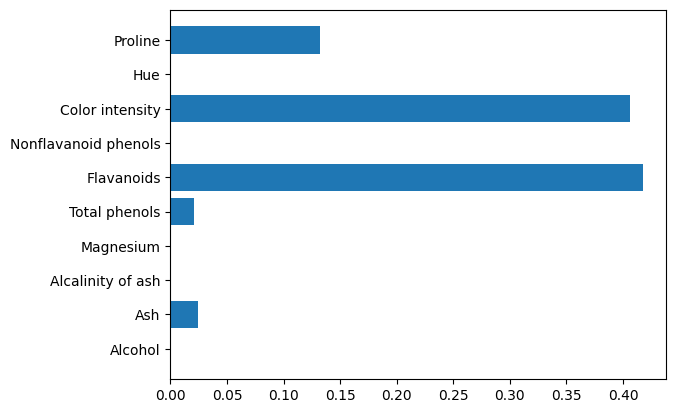

In [65]:
# 可視化
y = df_test.columns
width = feature_importance

# 横向きで表示
plt.barh(y=y, width=width);